# Education & Income Submetric Analysis
This notebook analyzes Pittsburgh neighborhoods based on **Education and Income (2010)** data from WPRDC.

It constructs a composite **Education - Income Index**, combining:
- Higher Education Rate (Bachelor's + Postgraduate)
- Median Income (2009, adjusted to 2013 dollars)
- Poverty Rate (inverted, lower is better)

### Metric definition
$$ Education–Income Index = (Edu_norm + Income_norm + (1 - Poverty_norm)) / 3 $$

All indicators are min-max normalized to ensure comparability across neighborhoods.

## Exploring the dataset

The dataset `education_income_index.csv` already includes:

- **Neighborhood**: name of the neighborhood  
- **Edu. Attainment: Bachelor's Degree (2010)**: share of residents with a bachelor’s degree  
- **Edu. Attainment: Postgraduate Degree (2010)**: share of residents with a postgraduate degree  
- **Median_Income**: median household income in the neighborhood  
- **Poverty_Rate**: fraction of residents living below the poverty line  
- **Higher_Edu_Rate**: combined rate of residents with bachelor’s or postgraduate degrees  
- **Edu_norm, Income_norm, Poverty_norm**: min–max normalized versions of higher education rate, median income, and  poverty rate  
- **Edu_Income_Index**: the final metric combining the three normalized components


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path='education-income.xls'
df=pd.read_excel(file_path)

# Select relevant columns
df_main = df[['Neighborhood',
              "Edu. Attainment: Bachelor's Degree (2010)",
              "Edu. Attainment: Postgraduate Degree (2010)",
              "2009 Med. Income ('13 Dollars)",
              'Est. Percent Under Poverty (2010)']].copy()

# Compute higher education rate
df_main['Higher_Edu_Rate']=df_main["Edu. Attainment: Bachelor's Degree (2010)"] + df_main["Edu. Attainment: Postgraduate Degree (2010)"]

# Rename for simplicity
df_main.rename(columns={
    "2009 Med. Income ('13 Dollars)": 'Median_Income',
    'Est. Percent Under Poverty (2010)': 'Poverty_Rate'
}, inplace=True)

# Define min-max normalization function
def minmax_norm(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize
df_main['Edu_norm']=minmax_norm(df_main['Higher_Edu_Rate'])
df_main['Income_norm']=minmax_norm(df_main['Median_Income'])
df_main['Poverty_norm']=minmax_norm(1 - df_main['Poverty_Rate'])  # lower poverty = better

# Compute composite index
df_main['Edu_Income_Index']=(df_main['Edu_norm'] + df_main['Income_norm'] + df_main['Poverty_norm']) / 3

# Rank neighborhoods
ranked = df_main.sort_values('Edu_Income_Index', ascending=False).reset_index(drop=True)
top10 = ranked.head(10)
bottom10 = ranked.tail(10)
ranked.to_csv('education_income_index.csv', index=False)

ranked.head()

,Neighborhood,Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),Median_Income,Poverty_Rate,Higher_Edu_Rate,Edu_norm,Income_norm,Poverty_norm,Edu_Income_Index
0,South Shore,0.000000,0.476190,163772.500000,0.000000,0.476190,0.713252,1.000000,1.000000,0.904417
1,Regent Square,0.210121,0.440044,84635.230000,0.010929,0.650165,0.973835,0.516785,0.989071,0.826564
2,Squirrel Hill North,0.266796,0.400838,91408.853333,0.088467,0.667633,1.000000,0.558145,0.911533,0.823226
3,Point Breeze,0.259139,0.325081,95704.180000,0.045509,0.584220,0.875062,0.584373,0.954491,0.804642
4,Strip District,0.334086,0.185102,70706.120000,0.021322,0.519187,0.777653,0.431734,0.978678,0.729355


##  Top 10 and Bottom 10 Neighborhoods

In [2]:
# Display Top 10 and Bottom 10 neighborhoods
print('Top 10 Neighborhoods by Education Income Index:\n')
display(top10[['Neighborhood', 'Edu_Income_Index']])
print('\nBottom 10 Neighborhoods:\n')
display(bottom10[['Neighborhood', 'Edu_Income_Index']])

Top 10 Neighborhoods by Education Income Index:



,Neighborhood,Edu_Income_Index
0,South Shore,0.904417
1,Regent Square,0.826564
2,Squirrel Hill North,0.823226
3,Point Breeze,0.804642
4,Strip District,0.729355
5,Highland Park,0.717362
6,Squirrel Hill South,0.711556
7,North Shore,0.687365
8,Allegheny West,0.684996
9,Shadyside,0.679692



Bottom 10 Neighborhoods:



,Neighborhood,Edu_Income_Index
80,Glen Hazel,0.281588
81,St. Clair,0.272851
82,California-Kirkbride,0.264342
83,Terrace Village,0.262816
84,Homewood North,0.242394
85,Arlington Heights,0.201061
86,Esplen,0.192819
87,Northview Heights,0.168432
88,Bluff,0.132550
89,Chateau,NaN


##  Visualization

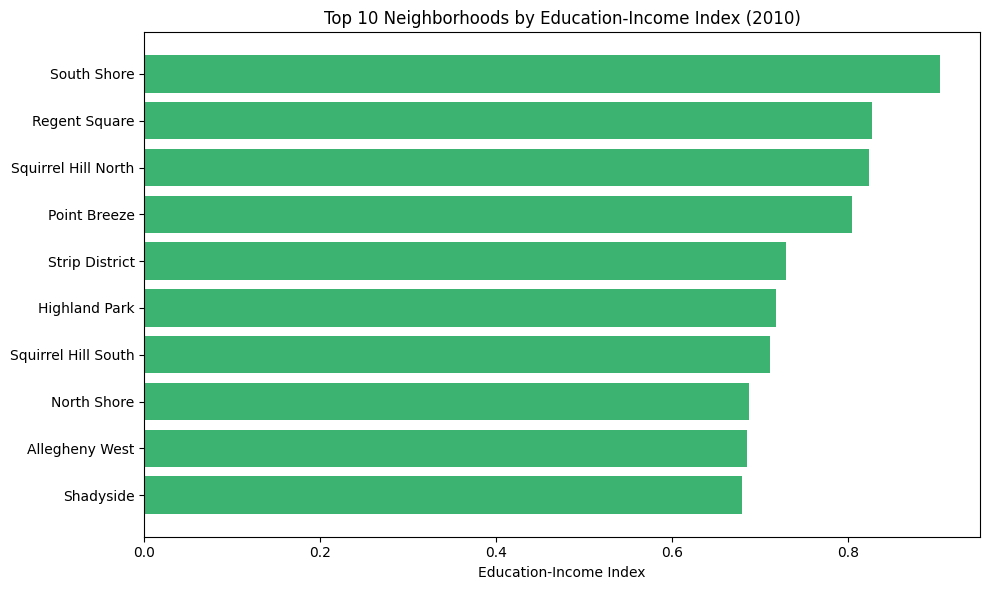

In [3]:
plt.figure(figsize=(10,6))
plt.barh(top10['Neighborhood'], top10['Edu_Income_Index'], color='mediumseagreen')
plt.gca().invert_yaxis()
plt.title('Top 10 Neighborhoods by Education-Income Index (2010)')
plt.xlabel('Education-Income Index')
plt.tight_layout()
plt.show()

## Interpretation
Neighborhoods like **South Shore**, **Regent Square**, and **Squirrel Hill North** showed the highest composite Education-Income Index, meaning they had a combination of:
- Higher proportion of residents with bachelor's or postgraduate degrees
- Higher median income levels
- Lower poverty rates

 Note: This dataset is from 2010; current conditions may differ substantially.

##  Conclusion
This submetric quantifies how education and income jointly reflect the social and economic well-being of Pittsburgh neighborhoods.

In the final group project, this metric can be combined with others, such as safety, greenery, or accessibility, to determine the overall 'Best Neighborhood in Pittsburgh'.

In [5]:
# Export education-income score to CSV for final metric
edu_income_export = ranked[['Neighborhood', 'Edu_Income_Index']].copy()
edu_income_export.columns = ['neighborhood', 'score']
edu_income_export.to_csv('../Final_Notebook_Data/yang_education_score.csv', index=False)


Based on the Education–Income Index, the best neighborhood in Pittsburgh according to my metric is: **South Shore**.
This neighborhood scores the highest because it ranks well in educational attainment, median income, and poverty level.

South Shore ranks highest because it has:

- One of the **highest education rates** in the city  
- A **very high median household income**  
- A **very low poverty rate**  

These three components together give South Shore the strongest overall Education-Income Index in the dataset.

From a data-driven perspective focused on educational attainment and economic stability, South Shore appears to be the “best” neighborhood.

However, this does not necessarily align with my personal favorite neighborhood in Pittsburgh.  
My personal preference is shaped more by daily life factors, such as restaurants, culture, community atmosphere, and convenience, which are not captured by the Education-Income Index.

This highlights an important observation:  
**A quantitative metric can identify strong neighborhoods on specific dimensions, but it cannot fully represent the lived experience or personal preferences of residents.**